# Loan-Approval-Prediction

In [1]:
import pandas as pd

df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
# checking missing values and data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
# checking the shape of the dataset
df.shape

(4269, 13)

In [4]:
# removes whitespaces
df.columns = df.columns.str.strip()

In [5]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


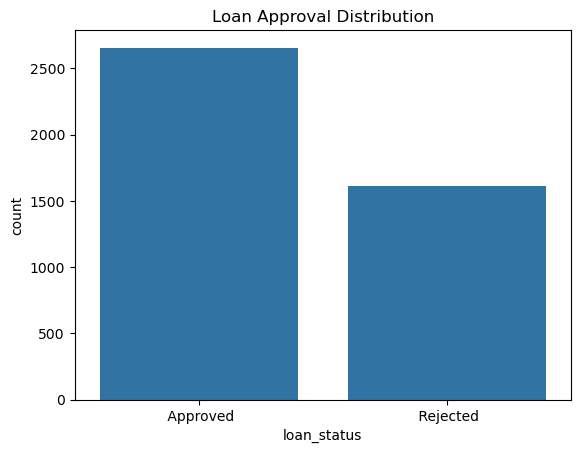

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['loan_status'])
plt.title("Loan Approval Distribution")
plt.show()

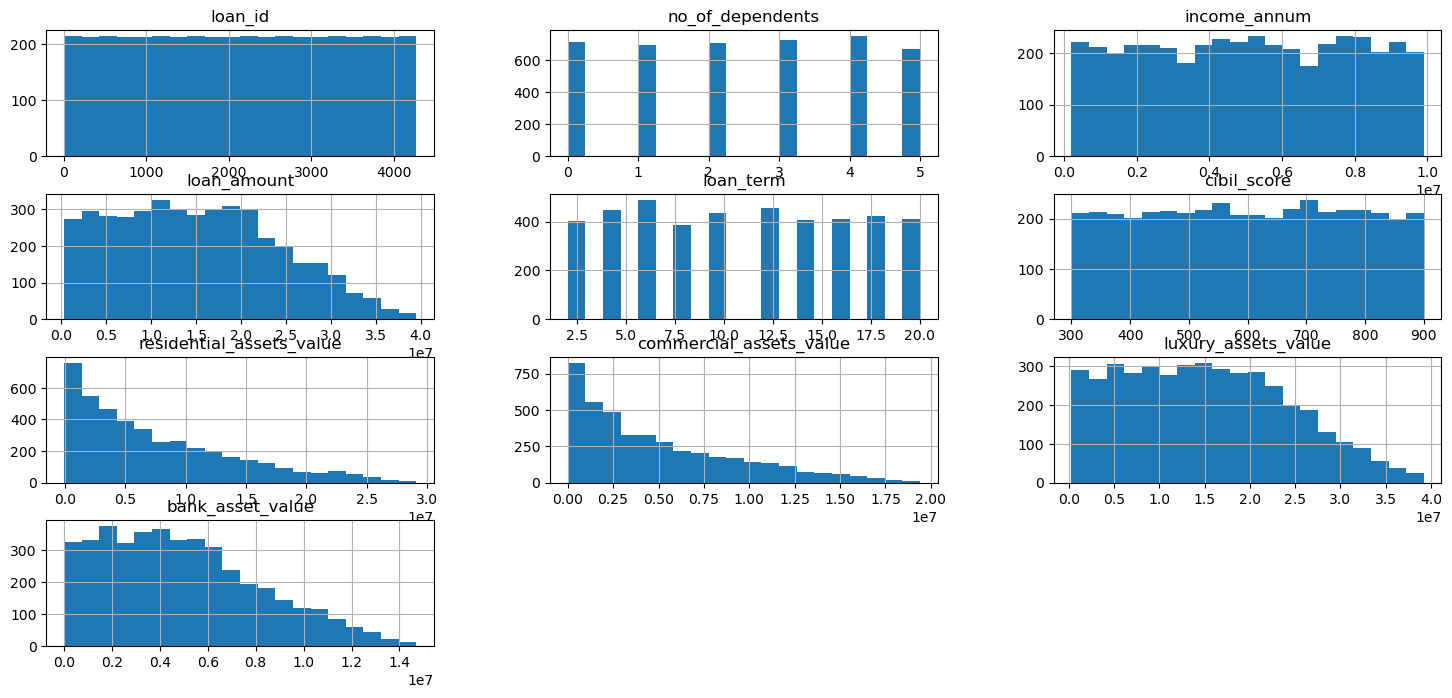

In [8]:
df.hist(figsize=(18,8), bins=20)
plt.show()

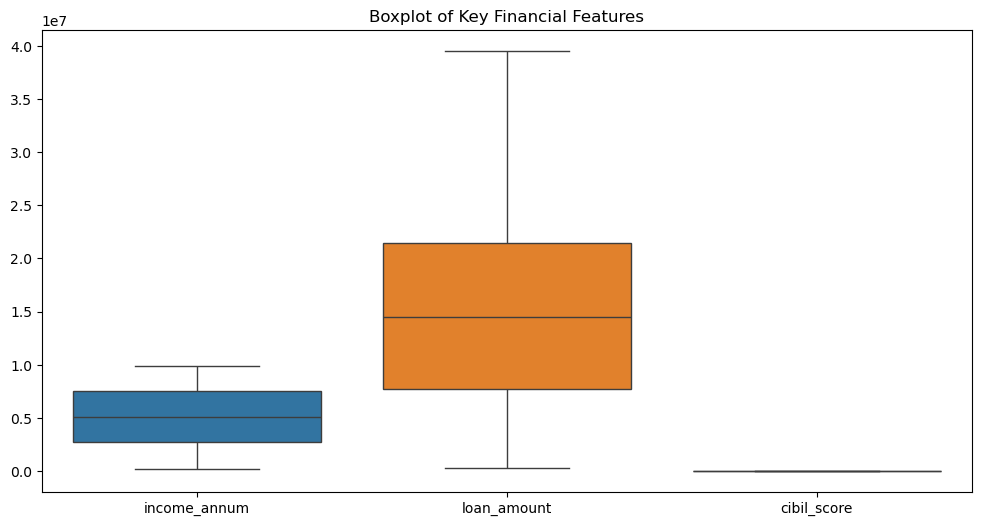

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['income_annum', 'loan_amount', 'cibil_score']])
plt.title("Boxplot of Key Financial Features")
plt.show()

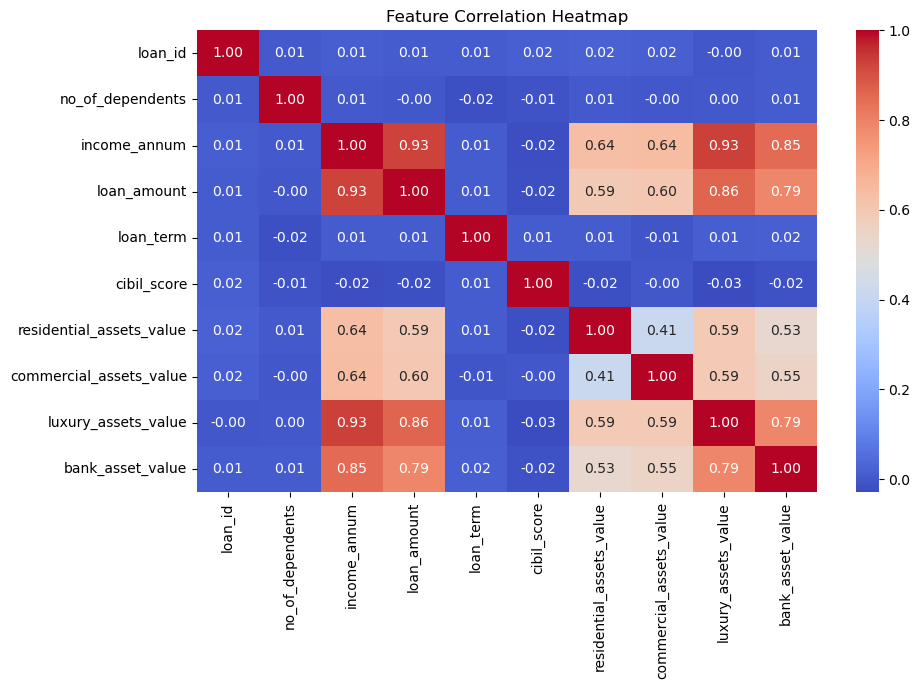

In [10]:
plt.figure(figsize=(10,6))

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [12]:
df = df.drop_duplicates()

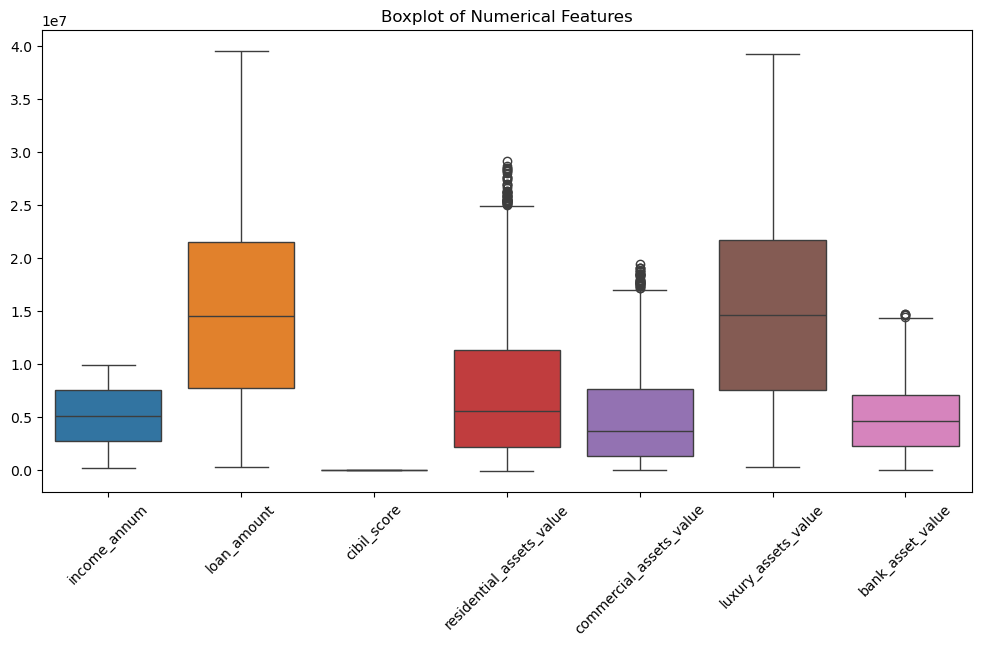

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['income_annum', 'loan_amount', 'cibil_score', 
                     'residential_assets_value', 'commercial_assets_value', 
                     'luxury_assets_value', 'bank_asset_value']])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [16]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Data Preprocessing
# Remove leading/trailing spaces from categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].str.strip()

# Verify unique values after cleaning
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

# Handle missing values (replace negative values in residential_assets_value)
df[' residential_assets_value'] = df[' residential_assets_value'].apply(lambda x: x if x > 0 else np.nan)
df[' residential_assets_value'].fillna(df[' residential_assets_value'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

# Exploratory Data Analysis
plt.figure(figsize=(8,6)
sns.countplot(x=' loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Featuring Engineering and Selection
X = df.drop(['loan_id', ' loan_status'], axis=1)  # Features
y = df['loan_status']  # Target variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Model Training - Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_smote)

best_rf = grid_search.best_estimator_

# Model Evaluation
y_pred = best_rf.predict(X_test_scaled)
y_prob = best_rf.predict_proba(X_test_scaled)[:,1]

print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Step 12: Saving the Model and Scaler
joblib.dump(best_rf, 'loan_approval_model.pkl')
joblib.dump

SyntaxError: '(' was never closed (2921881273.py, line 40)

Unique values in  education: ['Graduate' 'Not Graduate']
Unique values in  self_employed: ['No' 'Yes']
Unique values in  loan_status: ['Approved' 'Rejected']


C:\Users\suhai\AppData\Local\Temp\ipykernel_10344\2237130707.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' residential_assets_value'].fillna(df[' residential_assets_value'].median(), inplace=True)


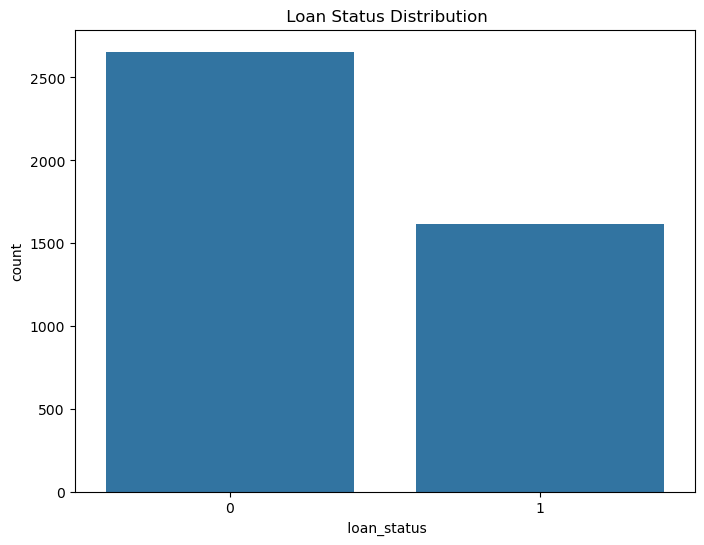


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       797
           1       0.97      0.97      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281


Confusion Matrix:
 [[782  15]
 [ 14 470]]

ROC AUC Score: 0.9972145027323538

Accuracy: 0.9773614363778298


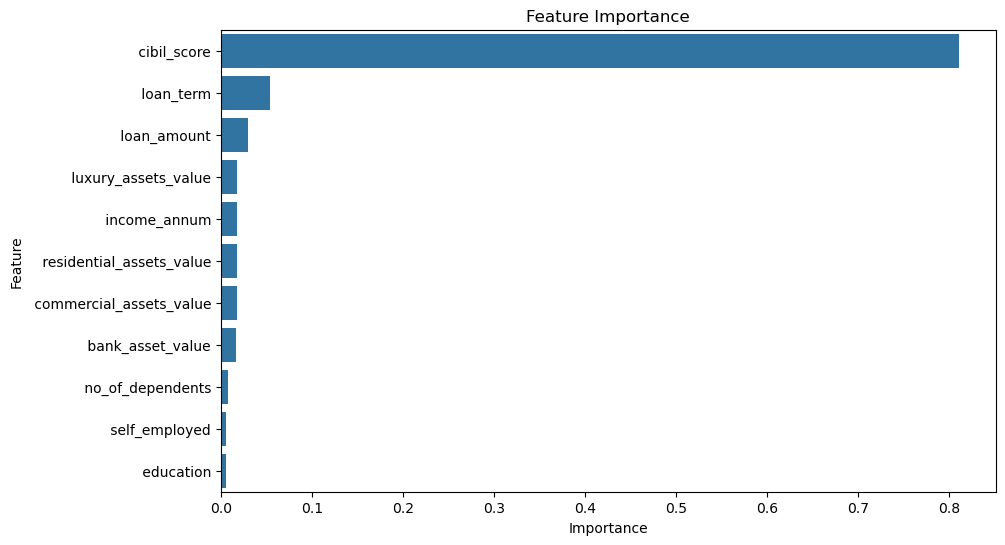


Model, scaler, and encoders saved successfully!


In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Data Preprocessing
# Removing leading/trailing spaces from categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].str.strip()

# Verifying unique values after cleaning
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

# Handling missing values (replace negative values in residential_assets_value)
df[' residential_assets_value'] = df[' residential_assets_value'].apply(lambda x: x if x > 0 else np.nan)
df[' residential_assets_value'].fillna(df[' residential_assets_value'].median(), inplace=True)

# Encoding categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.countplot(x=' loan_status', data=df)
plt.title(' Loan Status Distribution')
plt.show()

# Featuring Engineering and Selection
X = df.drop(['loan_id', ' loan_status'], axis=1)  # Features
y = df[' loan_status']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Model Training - Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_smote)

best_rf = grid_search.best_estimator_

# Model Evaluation
y_pred = best_rf.predict(X_test_scaled)
y_prob = best_rf.predict_proba(X_test_scaled)[:,1]

print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Saving the Model and Scaler
joblib.dump(best_rf, 'loan_approval_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')  # Save encoders to decode categories later

print("\nModel, scaler, and encoders saved successfully!")
